***Data Exploration***

In [85]:
import pandas as pd

In [86]:
df_bookings = pd.read_csv("Dataset/fact_bookings.csv")
df_bookings.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [87]:
df_bookings.shape

(134590, 12)

In [88]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [89]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

<AxesSubplot:>

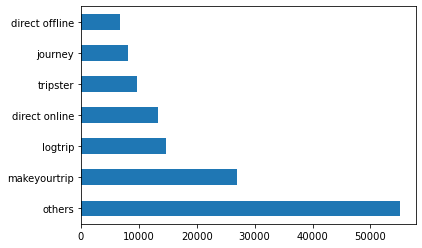

In [90]:
df_bookings.booking_platform.value_counts().plot(kind = "barh")

In [91]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [92]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [93]:
df_date = pd.read_csv("Dataset/dim_date.csv")
df_hotels = pd.read_csv("Dataset/dim_hotels.csv")
df_rooms = pd.read_csv("Dataset/dim_rooms.csv")
df_agg_bookings = pd.read_csv("Dataset/fact_aggregated_bookings.csv")

In [94]:
df_hotels.shape

(25, 4)

In [95]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [96]:
df_hotels.category.unique()

array(['Luxury', 'Business'], dtype=object)

In [97]:
df_hotels.city.unique()

array(['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore'], dtype=object)

In [98]:
df_hotels.category.value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

<AxesSubplot:>

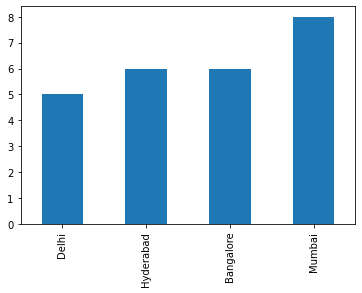

In [99]:
df_hotels.city.value_counts().sort_values().plot(kind="bar")

***Data Cleaning***

In [100]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [101]:
df_bookings[df_bookings.no_guests<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [102]:
df_bookings[df_bookings.no_guests<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [103]:
df_bookings = df_bookings[df_bookings.no_guests>0]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [104]:
df_bookings.shape

(134578, 12)

In [105]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [106]:
avg,std = df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()

In [107]:
avg,std

(15378.036937686695, 93040.15493143328)

In [108]:
higher_limit = avg + std*3
higher_limit

294498.50173198653

In [109]:
lower_limit = avg - std*3
lower_limit

-263742.4278566132

In [110]:
df_bookings[df_bookings.revenue_generated<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [111]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [112]:
df_bookings = df_bookings[df_bookings.revenue_generated<higher_limit]
df_bookings.shape

(134573, 12)

In [113]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [114]:
Higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
Higher_limit

33479.3586618449

In [115]:
df_bookings[df_bookings.revenue_realized>Higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [116]:
df_bookings["room_category"].unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [117]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [118]:
df_bookings[df_bookings.room_category == "RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [119]:
higher_limit_RT4 = 23439.308444 + 3*9048.599076
higher_limit_RT4

50585.105672000005

In [120]:
df_bookings.isnull()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,True,False,False,False
7,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,False,False,False,False,False,False,False,False,False,False,False,False
134585,False,False,False,False,False,False,False,False,False,False,False,False
134587,False,False,False,False,False,False,False,False,True,False,False,False
134588,False,False,False,False,False,False,False,False,False,False,False,False


In [121]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

***Data Tranformations***

In [122]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [123]:
df_agg_bookings["occ_pct"] = df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368


In [124]:
df_agg_bookings["occ_pct"] = df_agg_bookings["occ_pct"].apply(lambda x : round(x*100,2))
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


**Find the occupancy rate in each of the room category**

In [125]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [126]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [127]:
df = pd.merge(df_agg_bookings,df_rooms,left_on = "room_category",right_on = "room_id")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard


In [128]:
df.groupby("room_class")["occ_pct"].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: occ_pct, dtype: float64

In [129]:
df.drop("room_id",axis=1,inplace=True)

In [130]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,Standard


**What is the Average Occupancy rate per city?**

In [131]:
df = pd.merge(df,df_hotels,on="property_id")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,53.33,Standard,Atliq Exotica,Luxury,Mumbai


<AxesSubplot:xlabel='city'>

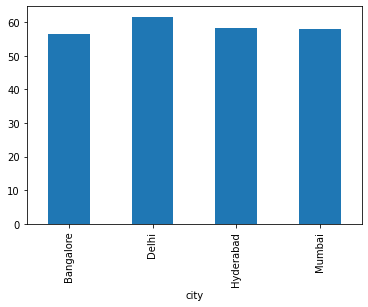

In [132]:
df.groupby("city")["occ_pct"].mean().plot(kind="bar")

**Better occupancy: Weekdays or Weekends?**

In [133]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [134]:
df = pd.merge(df,df_date,left_on="check_in_date",right_on="date")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [135]:
df = df.replace("weekeday","weekday")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekday
3,16559,10-May-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekday
4,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekday


In [136]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekday    50.90
weekend    72.39
Name: occ_pct, dtype: float64

**Find the occupancy of different cities in the month of July**

In [137]:
df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [138]:
df_jul22 = df[df["mmm yy"] == "Jul 22"]
df_jul22.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
4300,16559,10-Jul-22,RT1,26,30.0,86.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jul-22,Jul 22,W 29,weekend
4301,16559,10-Jul-22,RT2,38,41.0,92.68,Elite,Atliq Exotica,Luxury,Mumbai,10-Jul-22,Jul 22,W 29,weekend
4302,16559,10-Jul-22,RT3,28,32.0,87.50,Premium,Atliq Exotica,Luxury,Mumbai,10-Jul-22,Jul 22,W 29,weekend
4303,16559,10-Jul-22,RT4,17,18.0,94.44,Presidential,Atliq Exotica,Luxury,Mumbai,10-Jul-22,Jul 22,W 29,weekend
4304,19562,10-Jul-22,RT1,26,30.0,86.67,Standard,Atliq Bay,Luxury,Bangalore,10-Jul-22,Jul 22,W 29,weekend


In [139]:
df_jul22 = df[df["mmm yy"] == "Jul 22"]
df_jul22.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
4300,16559,10-Jul-22,RT1,26,30.0,86.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jul-22,Jul 22,W 29,weekend
4301,16559,10-Jul-22,RT2,38,41.0,92.68,Elite,Atliq Exotica,Luxury,Mumbai,10-Jul-22,Jul 22,W 29,weekend
4302,16559,10-Jul-22,RT3,28,32.0,87.50,Premium,Atliq Exotica,Luxury,Mumbai,10-Jul-22,Jul 22,W 29,weekend
4303,16559,10-Jul-22,RT4,17,18.0,94.44,Presidential,Atliq Exotica,Luxury,Mumbai,10-Jul-22,Jul 22,W 29,weekend
4304,19562,10-Jul-22,RT1,26,30.0,86.67,Standard,Atliq Bay,Luxury,Bangalore,10-Jul-22,Jul 22,W 29,weekend


In [140]:
df_jul22 = df[df["mmm yy"] == "Jul 22"]
df_jul22.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
4300,16559,10-Jul-22,RT1,26,30.0,86.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jul-22,Jul 22,W 29,weekend
4301,16559,10-Jul-22,RT2,38,41.0,92.68,Elite,Atliq Exotica,Luxury,Mumbai,10-Jul-22,Jul 22,W 29,weekend
4302,16559,10-Jul-22,RT3,28,32.0,87.50,Premium,Atliq Exotica,Luxury,Mumbai,10-Jul-22,Jul 22,W 29,weekend
4303,16559,10-Jul-22,RT4,17,18.0,94.44,Presidential,Atliq Exotica,Luxury,Mumbai,10-Jul-22,Jul 22,W 29,weekend
4304,19562,10-Jul-22,RT1,26,30.0,86.67,Standard,Atliq Bay,Luxury,Bangalore,10-Jul-22,Jul 22,W 29,weekend


<AxesSubplot:ylabel='occ_pct'>

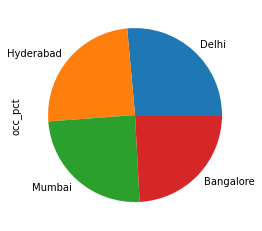

In [141]:
df_jul22.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending=False).plot(kind="pie")

**What is the revenue realized per city?**

In [142]:
df.tail()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
6495,17564,31-Jul-22,RT4,10,17.0,58.82,Presidential,Atliq Seasons,Business,Mumbai,31-Jul-22,Jul 22,W 32,weekend
6496,18560,31-Jul-22,RT1,22,30.0,73.33,Standard,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
6497,18560,31-Jul-22,RT2,34,40.0,85.00,Elite,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
6498,18560,31-Jul-22,RT3,17,24.0,70.83,Premium,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
6499,18560,31-Jul-22,RT4,12,15.0,80.00,Presidential,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend


In [143]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [144]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [145]:
df_bookings_total = pd.merge(df_bookings,df_hotels,on="property_id")
df_bookings_total.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [146]:
df_bookings_total.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

**What is the revenue by month?**

In [147]:
df_bookings_total.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [148]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [149]:
pd.merge(df_bookings_total,df_date,left_on="check_in_date",right_on="date")

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


In [150]:
df_bookings_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [151]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [152]:
df_date["date"] = pd.to_datetime(df_date["date"])
df_date["date"].head()

0   2022-05-01
1   2022-05-02
2   2022-05-03
3   2022-05-04
4   2022-05-05
Name: date, dtype: datetime64[ns]

In [153]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [154]:
df_bookings_total["check_in_date"] = pd.to_datetime(df_bookings_total["check_in_date"])
df_bookings_total["check_in_date"].head()

0   2022-01-05
1   2022-01-05
2   2022-01-05
3   2022-01-05
4   2022-01-05
Name: check_in_date, dtype: datetime64[ns]

In [155]:
df_bookings_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      134573 non-null  datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

In [156]:
df_bookings_total.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,2022-01-05,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [157]:
df_bookings_total = pd.merge(df_bookings_total,df_date,left_on="check_in_date",right_on="date")
df_bookings_total.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


**What is the revenue realized per hotel type?**

In [161]:
df_bookings_total.groupby("property_name")["revenue_realized"].sum()

property_name
Atliq Bay        179416721
Atliq Blu        179203544
Atliq City       196555383
Atliq Exotica    219076161
Atliq Grands     145860641
Atliq Palace     209474575
Atliq Seasons     45920757
Name: revenue_realized, dtype: int64

**Find the average rating per city**

In [168]:
df_bookings_total.groupby("city")["ratings_given"].mean().round(2).sort_values(ascending=False)

city
Delhi        3.78
Hyderabad    3.66
Mumbai       3.64
Bangalore    3.40
Name: ratings_given, dtype: float64

**What is the revenue realized per booking platform?**

<AxesSubplot:ylabel='revenue_realized'>

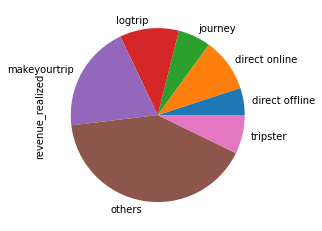

In [170]:
df_bookings_total.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")